<a href="https://colab.research.google.com/github/Joskey23/ACE-6233-Lab/blob/main/1201101579_AIS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression model that uses height to predict weight

Load modules and packages

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Load dataset

In [3]:
url = "https://raw.githubusercontent.com/wooihaw/datasets/main/genders_heights_weights.csv"
df = pd.read_csv(url)

Print out the dimension of dataset, and the corresponding data types

In [4]:
print("Dataset Overview:")
print(df.head())
print(f"\nDataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")


Dataset Overview:
   Gender  Height  Weight
0  Female   162.5    67.3
1  Female   155.8    55.3
2  Female   168.7    58.7
3    Male   170.8    75.6
4  Female   159.8    59.7

Dataset shape: (10000, 3)

Column names: ['Gender', 'Height', 'Weight']

Data types:
Gender     object
Height    float64
Weight    float64
dtype: object


Preview 10 lines of data randomly

In [5]:
random_sample = df.sample(n=10, random_state=42)
print(random_sample)

      Gender  Height  Weight
6252    Male   181.1    96.2
4684    Male   173.9    81.0
1731  Female   165.7    65.3
4742    Male   181.9    94.4
4521  Female   152.9    46.3
6340  Female   153.2    49.0
576   Female   159.5    57.5
5202    Male   181.0    87.1
6363    Male   170.9    84.0
439     Male   176.2    82.6


Descriptive statistics

In [6]:
print("\nDescriptive statistics:")
print(df.describe())



Descriptive statistics:
             Height        Weight
count  10000.000000  10000.000000
mean     168.573940     73.228260
std        9.772842     14.563851
min      137.800000     29.300000
25%      161.300000     61.600000
50%      168.400000     73.100000
75%      175.700000     84.900000
max      200.700000    122.500000


Split dataset into training and testing sets

#Linear Regression without gender

Use height to predict weight without considering gender

In [8]:
X1 = df[['Height']]
y = df['Weight']


Split data into train and test set

In [9]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [10]:
print(f"Training set size: {X1_train.shape[0]} samples")
print(f"Testing set size: {X1_test.shape[0]} samples")

Training set size: 8000 samples
Testing set size: 2000 samples


Linear Regression

In [11]:
# Initialize the linear regression model
model1 = LinearRegression()

Training

In [12]:
# Fit the model to the training data
model1.fit(X1_train, y_train)

LinearRegression()

Evaluate with 5-cross-validation using validation set obtained from train set

In [15]:
# Evaluate the model's performance based on evaluation metrics, e.g. R2 score, Mean Squared Error, etc.
cv_scores_1 = cross_val_score(model1, X1_train, y_train, cv=5, scoring='r2')


In [16]:
print(f"Cross-validation R² scores: {cv_scores_1}")
print(f"Mean CV R² Score: {cv_scores_1.mean():.4f} (±{cv_scores_1.std():.4f})")

Cross-validation R² scores: [0.86441303 0.84564411 0.85595277 0.84802563 0.85372429]
Mean CV R² Score: 0.8536 (±0.0066)


Evaluate with test set

In [21]:
y_pred1 = model1.predict(X1_test)
#calculate r2 values for test set
r2_1 = r2_score(y_test, y_pred1)
#calculate MSE for the test set
mse_1 = mean_squared_error(y_test, y_pred1)

The performance metric of test set will always be the same since a simple spliting of data is used

In [33]:
print(f"Model 1 Performance (Height only):")
print(f"CV R² Score: {cv_scores_1.mean():.4f}")
print(f"Test R² Score: {r2_1:.4f}")
print(f"Test MSE: {mse_1:.4f}")
print(f"Test RMSE: {np.sqrt(mse_1):.4f}")

Model 1 Performance (Height only):
CV R² Score: 0.8536
Test R² Score: 0.8600
Test MSE: 30.7064
Test RMSE: 5.5413


Now make use of the `gender` info

Encode `Gender` using *one-hot encoding*

In [23]:
df_encoded = pd.get_dummies(df, columns=['Gender'], prefix='Gender')

In [24]:
print("Columns after one-hot encoding:", list(df_encoded.columns))


Columns after one-hot encoding: ['Height', 'Weight', 'Gender_Female', 'Gender_Male']


This round, keep the gender info.

In [25]:
# Prepare data with gender
X2 = df_encoded[['Height', 'Gender_Female', 'Gender_Male']]
y2 = df_encoded['Weight']

Split into training and testing datasets

In [26]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

An insight on the current prepared data

In [32]:
print(f"Features with gender: {list(X2.columns)}")
print(f"Training set size: {X2_train.shape[0]} samples")
print(f"Testing set size: {X2_test.shape[0]} samples")

Features with gender: ['Height', 'Gender_Female', 'Gender_Male']
Training set size: 8000 samples
Testing set size: 2000 samples


Training and validating again with 5-cross validation

In [28]:
# Initialize a new linear regression model
model2 = LinearRegression()

# Fit the model to the training data
model2.fit(X2_train, y2_train)

# Evaluate the new model's performance
cv_scores_2 = cross_val_score(model2, X2_train, y2_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores_2}")
print(f"Mean CV R² Score: {cv_scores_2.mean():.4f} (±{cv_scores_2.std():.4f})")


Cross-validation R² scores: [0.90971166 0.8946123  0.90550074 0.8944187  0.90534474]
Mean CV R² Score: 0.9019 (±0.0062)


Evaluate with test set

In [29]:
# Evaluate on test set
y_pred2 = model2.predict(X2_test)
r2_2 = r2_score(y2_test, y_pred2)
mse_2 = mean_squared_error(y2_test, y_pred2)

In [31]:
print(f"Model 2 Performance (Height + Gender):")
print(f"CV R² Score: {cv_scores_2.mean():.4f}")
print(f"Test R² Score: {r2_2:.4f}")
print(f"Test MSE: {mse_2:.4f}")
print(f"Test RMSE: {np.sqrt(mse_2):.4f}")


Model 2 Performance (Height + Gender):
CV R² Score: 0.9019
Test R² Score: 0.9047
Test MSE: 20.9034
Test RMSE: 4.5720


The R2 score has improved because the prediction is now empowered by one additional useful feature, i.e. gender.

Initialize visualization to plot Actual vs Predicted Graph (regression diagnostic graph) for both models

Plot the regression diagnostic graph for model 1 (model trained without "gender" as the feature)

CREATING VISUALIZATIONS


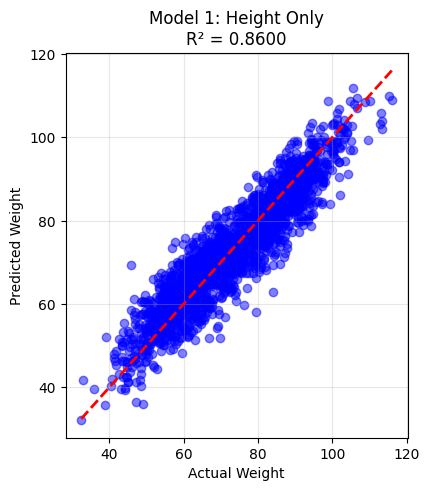

In [54]:
# Create figure size of 1500*500
print("CREATING VISUALIZATIONS")
plt.figure(figsize=(15, 5))
# Makes a figure with 1 row, 3 columns, and selects the 1st position
plt.subplot(1, 3, 1)
# Input the values of actual and predicted weight to create blue plot with 50% transparecy
plt.scatter(y_test, y_pred1, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# Labels axis
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
# Labels title
plt.title(f'Model 1: Height Only\nR² = {r2_1:.4f}')
# Add grid lines
plt.grid(True, alpha=0.3)

Plot the regression diagnostic graph for model 2 (model trained with "gender" as the feature)

CREATING VISUALIZATIONS


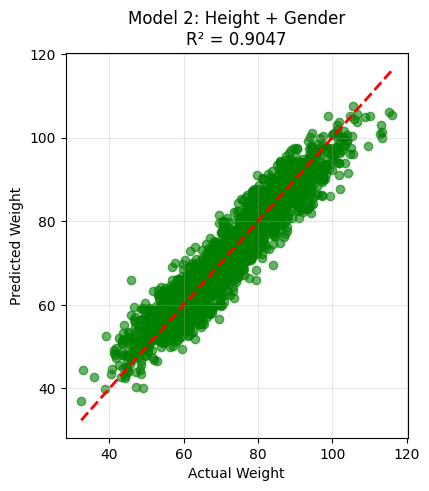

In [55]:
# Create figure size of 1500*500
print("CREATING VISUALIZATIONS")
plt.figure(figsize=(15, 5))
# Makes a figure with 2 rows, 3 columns, and selects the 1st position
plt.subplot(1, 3, 2)
# Input the values of actual and predicted weight to create blue plot with 50% transparecy
plt.scatter(y2_test, y_pred2, alpha=0.6, color='green')
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'r--', lw=2)

# Labels axis
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
# Labels title
plt.title(f'Model 2: Height + Gender\nR² = {r2_2:.4f}')
# Add grid lines
plt.grid(True, alpha=0.3)

## Classification of Fish Species

Load modules and packages

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [57]:
df = pd.read_csv('https://raw.githubusercontent.com/wooihaw/datasets/main/fish.csv')

Check the first 5 samples

In [58]:
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (159, 7)

First 5 rows:
  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


Sample 10 lines of data

In [59]:
print("Random sample of 10 rows:")
print(df.sample(n=10, random_state=42))

Random sample of 10 rows:
       Species  Weight  Length1  Length2  Length3   Height   Width
78       Perch    78.0     16.8     18.7     19.4   5.1992  3.1234
155      Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
128       Pike   200.0     30.0     32.3     34.8   5.5680  3.3756
55   Whitefish   270.0     23.6     26.0     28.7   8.3804  4.2476
94       Perch   150.0     21.0     23.0     24.5   5.2185  3.6260
29       Bream  1000.0     33.5     37.0     42.6  18.9570  6.6030
147      Smelt     7.0     10.1     10.6     11.6   1.7284  1.1484
51       Roach   180.0     23.6     25.2     27.9   7.0866  3.9060
98       Perch   188.0     22.6     24.6     26.2   6.7334  4.1658
141       Pike  1250.0     52.0     56.0     59.7  10.6863  6.9849


Describe statistics of the dataset

In [72]:
print(f"\nNumber of features: {df.shape[1] - 1}")  # Excluding target column

print("\nClass distribution:")
print(df['Species'].value_counts())


Number of features: 6

Class distribution:
Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64


What is the dimension of the dataset?

In [65]:
print(f"\nDataset shape: {df.shape}")


Dataset shape: (159, 7)


`Species` is the **Target**, other columns are the **Features**.

In [66]:
X = df.drop('Species', axis=1)
y = df['Species']

How many classes (Species) are there?

In [73]:
print(f"Number of classes: {df['Species'].nunique()}")
print(f"Target classes: {df['Species'].unique()}")

Number of classes: 7
Target classes: ['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


Split the dataset into training and testing sets

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [75]:
print(f"Training set size: {X_train.shape[0]} samples")

Training set size: 127 samples


In [76]:
print(f"Testing set size: {X_test.shape[0]} samples")

Testing set size: 32 samples


How many features are there in the dataset?

In [77]:
print(f"Number of features: {X_train.shape[1]}")

Number of features: 6


Start from the k-Nearest Neighbors (kNN) model

Train and evaluate a kNN model with k=1

In [78]:
# Manual testing k from 2 to 10
k_values = range(2, 11)
knn_results = []

In [90]:
for k in k_values:
    # Use pipeline with scaling for k-NN (preprocessing and model training)
    knn_pipeline = Pipeline([
        # Scale/normalize the features so all are on similar ranges
        # StandardScaler() converts features to have mean=0 and standard deviation=
        ('scaler', StandardScaler()),
        # Create k-NN classifier with current k value
        # KNeighborsClassifier finds k nearest neighbors to make predictions
        ('classifier', KNeighborsClassifier(n_neighbors=k)) # Input n values with k(rnages from 2 to 10)
    ])
    # Train the entire pipeline (scaling + k-NN) on training data
    # X_train = training features, y_train = training labels
    knn_pipeline.fit(X_train, y_train)
    # Make predictions on test data using the trained pipeline model
    y_pred = knn_pipeline.predict(X_test)
    # Calculate accuracy by comparing predictions to actual test labels
    accuracy = accuracy_score(y_test, y_pred)
    # Creates dictionary with k value and its corresponding accuracy
    knn_results.append({'k': k, 'accuracy': accuracy})
    print(f"k={k}: Accuracy = {accuracy:.4f}")

k=2: Accuracy = 0.7500
k=3: Accuracy = 0.8125
k=4: Accuracy = 0.7812
k=5: Accuracy = 0.8125
k=6: Accuracy = 0.8438
k=7: Accuracy = 0.8125
k=8: Accuracy = 0.7500
k=9: Accuracy = 0.7188
k=10: Accuracy = 0.7500


From the above testing, we found out that k=6 provides us with the highest accuracy (84.38%)

In [82]:
print(f"Grid search optimization:")
knn_param_grid = {
    'classifier__n_neighbors': list(range(2, 11)),
    'classifier__weights': ['uniform', 'distance']
}

knn_grid = GridSearchCV(
    Pipeline([('scaler', StandardScaler()), ('classifier', KNeighborsClassifier())]),
    knn_param_grid, cv=5, scoring='accuracy'
)

knn_grid.fit(X_train, y_train)
print(f"Best k-NN parameters: {knn_grid.best_params_}")
print(f"Best k-NN CV score: {knn_grid.best_score_:.4f}")



2. Grid search optimization:
Best k-NN parameters: {'classifier__n_neighbors': 2, 'classifier__weights': 'distance'}
Best k-NN CV score: 0.8271


Now try with a Decision Tree model for classification

Train and evaluate a Decision Tree Classifier (DTC) with max_depth=1

In [ ]:
# model = DTC()

In [ ]:
# model.fit()

In [ ]:
# print(f"DTC accuracy: ? }")

Try with different k values (by using a FOR loop)

In [ ]:
k_values = range(2, 11)
knn_scores = []

In [ ]:
for k in k_values:


Print out the results

In [ ]:
print("KNC Performance:")
for k, score in knn_scores:


Which k value gives the best performance?

Now try with different max_depth values for the DTC

In [ ]:
max_depth_values = list(range(2, 11))
dtc_scores = []

In [ ]:
for max_depth in max_depth_values:


Print out the results

In [ ]:
print("Decision Tree Performance:")
for max_depth, score in dtc_scores:


What is the maximum depth that gives the best performance?

Which classifier performs better?